# Example Application

## Import Data

### Libraries

In [1]:
import sys
sys.path.append('../src')
import pydysp
import matplotlib.pyplot as plt

### Information

In [2]:
# Test Information
directory = "example_1_data"
filenames = [
    "./"+directory+"/LE2402_T1.mat",
    "./"+directory+"/LE2402_T2.mat",
    "./"+directory+"/LE2402_T4.mat",
]
test_names = [
    "1-50Hz Noise, 0.06g",
    "1-50Hz Noise, 0.20g",
    "1-50Hz Noise, 0.50g",
]

In [3]:
# Channel information
channel_names = [
    "Acc1-R1",
    "Acc2-R1vert",
    "Acc3-R3",
    "Acc4-R5",
    "Acc5-R7",
    "Pot-R3",
    "Pot-R5",
    "Pot-R7",
    "Acc6-S1",
    "Acc7-S3",
    "Acc8-S3s",
    "Acc9-S5",
    "Acc10-S5s",
    "Acc11-S7",
    "Acc11-S5s",
]
channel_descriptions = [
    "Stack Ring 1Y",
    "Stack Ring 1Z",
    "Stack Ring 3Y",
    "Stack Ring 5Y",
    "Stack Ring 7Y",
    "Stack Ring 3Y",
    "Stack Ring 5Y",
    "Stack Ring 7Y",
    "Sand (510,0)",
    "Sand (510,242)",
    "Sand (300,242)",
    "Sand (510,462)",
    "Sand (300,462)",
    "Sand (510,682)",
    "Sand (300,682)",
]
units = [
    "g","g","g","g","g",
    "mm","mm","mm",
    "g","g","g","g","g","g","g"
]
calibrations = [
    1,1,1,1,1,
    0.039359,0.038985,0.038477,
    3.110,3.120,3.135,2.905,3.008,3.332,2.908
] #V/unit

### Data Import

In [4]:
# Create tests
test = [pydysp.test.Test() for _ in enumerate(filenames)]
for i,i_test in enumerate(test):
    i_test.read_equals(filename=filenames[i])
    i_test.set_test_info(name=test_names[i])
    i_test.set_channel_info(names=channel_names, descriptions=channel_descriptions, units=units, calibrations=calibrations)
    i_test.baseline_correct()
    i_test.filter()
    i_test.trim()

## Printing and plotting

In [5]:
test[0].get_test_info()

Name: 1-50Hz Noise, 0.06g
Description: Project reference: LE2401
Filename: D:\EERC\Students\EllaLee\LE2402\LE2402_T1.m
Time: Fri 23/Feb/202409:40:14
Number of Channels: 15
Channel Names:
  0: Acc1-R1
  1: Acc2-R1vert
  2: Acc3-R3
  3: Acc4-R5
  4: Acc5-R7
  5: Pot-R3
  6: Pot-R5
  7: Pot-R7
  8: Acc6-S1
  9: Acc7-S3
  10: Acc8-S3s
  11: Acc9-S5
  12: Acc10-S5s
  13: Acc11-S7
  14: Acc11-S5s


['1-50Hz Noise, 0.06g',
 'Project reference: LE2401',
 'D:\\EERC\\Students\\EllaLee\\LE2402\\LE2402_T1.m',
 'Fri 23/Feb/202409:40:14',
 15,
 ['Acc1-R1',
  'Acc2-R1vert',
  'Acc3-R3',
  'Acc4-R5',
  'Acc5-R7',
  'Pot-R3',
  'Pot-R5',
  'Pot-R7',
  'Acc6-S1',
  'Acc7-S3',
  'Acc8-S3s',
  'Acc9-S5',
  'Acc10-S5s',
  'Acc11-S7',
  'Acc11-S5s']]

In [6]:
test[0].channel[8].get_channel_info()

Name: Acc6-S1
Description: Sand (510,0)
Unit: g
Calibration: 3.11
Timestep: 0.001952
Points: 30505


['Acc6-S1', 'Sand (510,0)', 'g', 3.11, 0.001952, 30505]

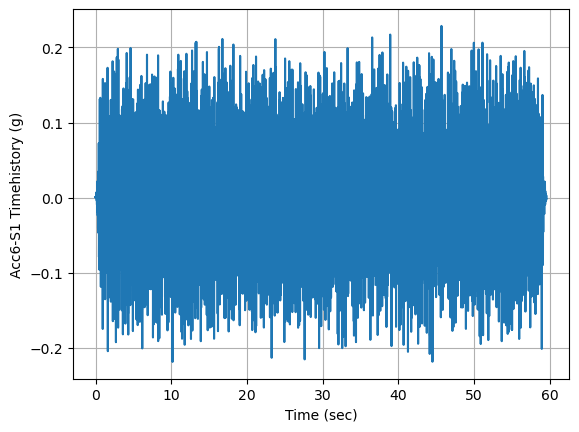

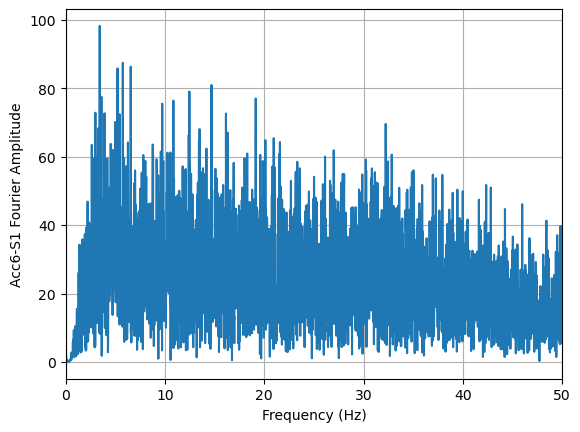

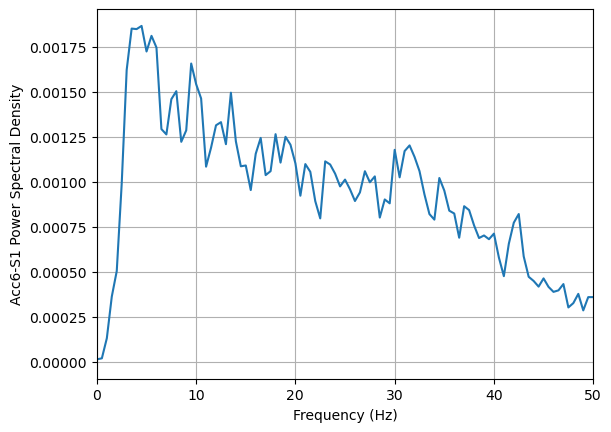

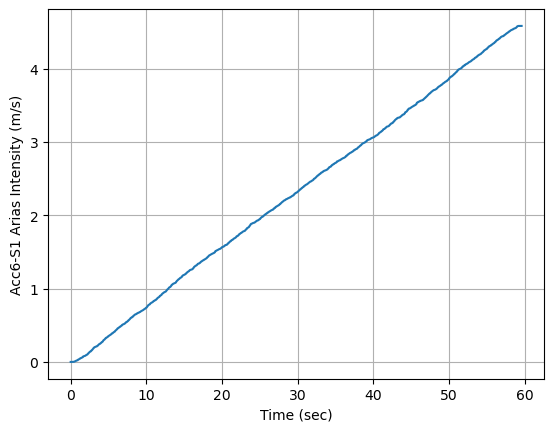

In [7]:
ax = test[1].channel[8].plot(plot_type="Timehistory")
ax = test[1].channel[8].plot(plot_type="Fourier")
ax = test[1].channel[8].plot(plot_type="Power", nperseg=1024)
ax = test[1].channel[8].plot(plot_type="Arias")

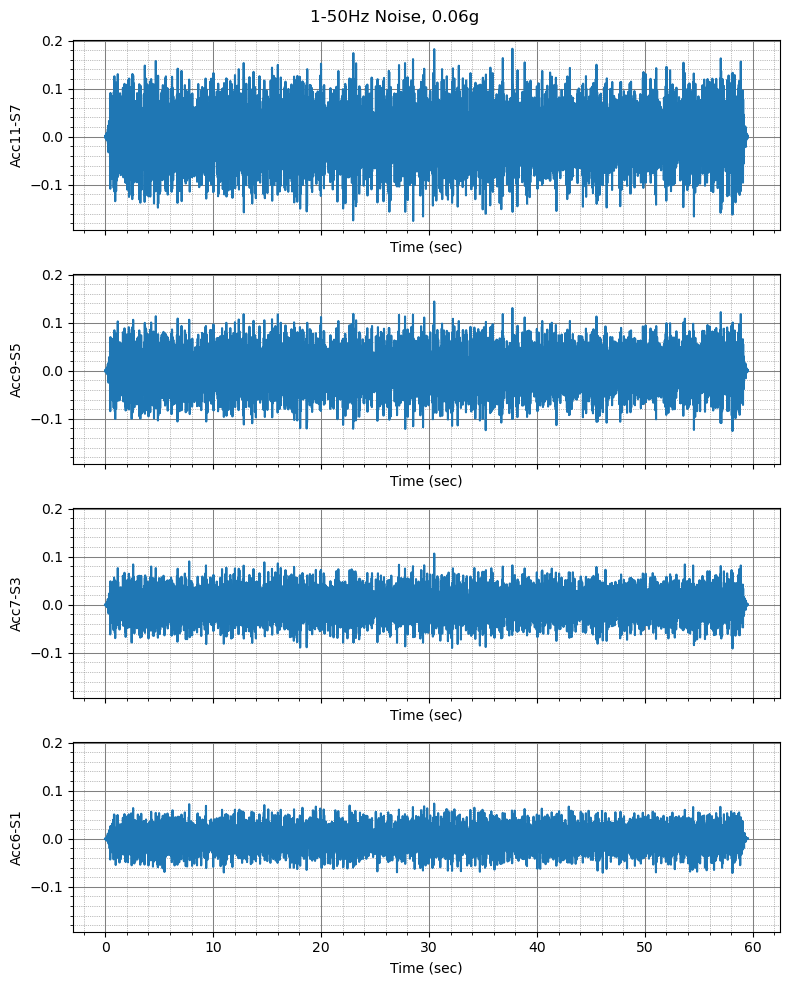

In [8]:
ax = test[0].plot(channels=[13,11,9,8], columns=1, plot_type="Timehistory") #same inputs as above
ax[0].figure.set_size_inches(8,10)
ax[0].minorticks_on()
for a in ax:
    a.grid(which='major', linestyle='-', linewidth=0.75, color='gray')
    a.grid(which='minor', linestyle=':', linewidth=0.5, color='gray')

In [9]:
for t in test:
    th=t.channel[8].timehistory()[1]
    print(f"{t.name}: t_max = {th[0]:.3f}, a_max = {th[1]:.3f}")

1-50Hz Noise, 0.06g: t_max = 30.482, a_max = 0.073
1-50Hz Noise, 0.20g: t_max = 45.700, a_max = 0.229
1-50Hz Noise, 0.50g: t_max = 30.192, a_max = 0.548


1-50Hz Noise, 0.06g: fn = 33.02, ksi = 0.116
1-50Hz Noise, 0.20g: fn = 27.02, ksi = 0.213
1-50Hz Noise, 0.50g: fn = 17.01, ksi = 0.525


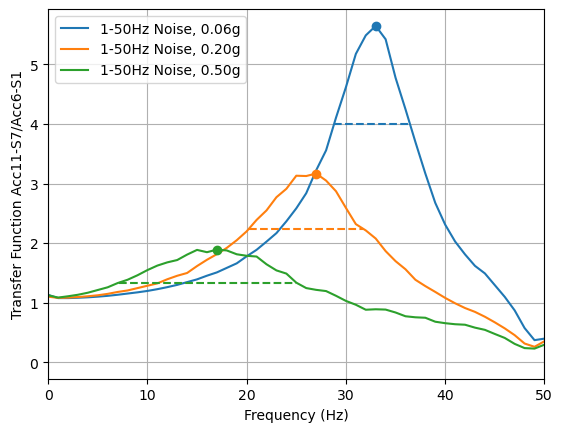

In [10]:
fix,ax = plt.subplots()
for t in test:
    tf=t.transfer_function(channel_from=8, channel_to=13, axis=ax, find_peak=True, find_damping=True, nperseg=512)
    print(f"{t.name}: fn = {tf[2][0]:.2f}, ksi = {tf[3]:.3f}")
leg=ax.legend()

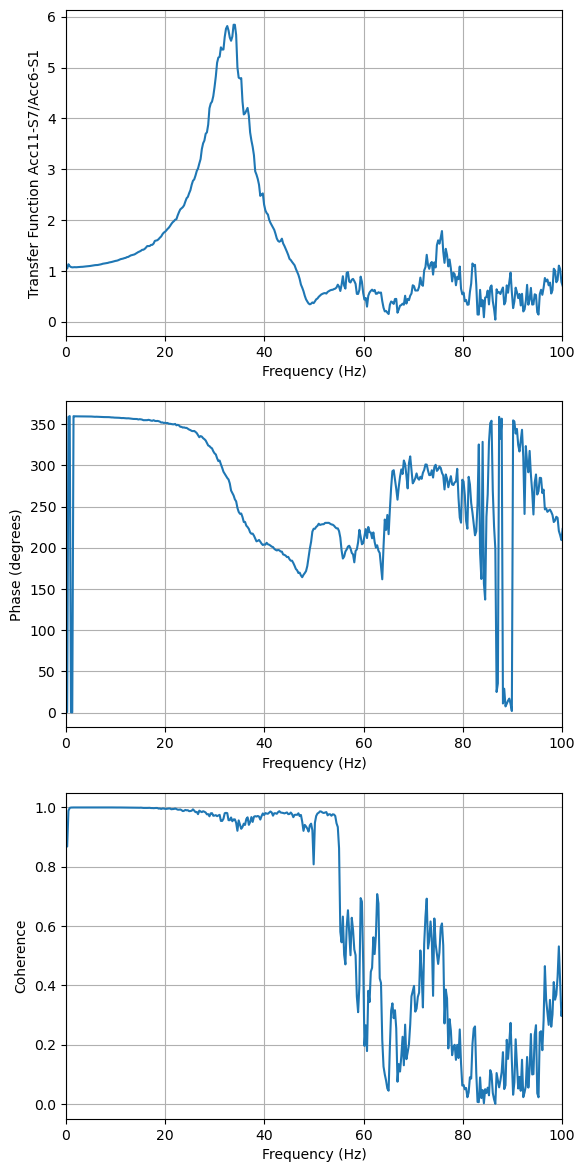

In [11]:
[_,[f,t,_,_,_,_],_,_]=test[0].transfer_function(channel_from=8, channel_to=13, xlim=100, nperseg=2000)

In [12]:
#for t in test:
    #t.export_to_csv(filename = t.filename.split("\\")[-1].split(".")[0]+".csv")